## EAS 503 Homework 1 Submission
Name - Hyungkyu Lim

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw1.ipynb**


### Submission Details
* **Due Date** - September 25, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 4
* **Maximum points** - 50
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.
* **Testing Protocol** - To grade, we will simply execute your notebook from command line using the following command:
```shell
jupyter nbconvert --execute <notebook>
```
Please make sure that your notebook produces the desired output with the above command, before submitting.

### Problem 1 - Testing for  Fibonacci Number (10 Points)
Develop functions to handle [Fibonacci numbers](http://mathworld.wolfram.com/FibonacciNumber.html). Try to design the quickest possible algorithm and record the time taken for the code to run.

Test if a number belongs to the Fibonacci series, using `if-else` conditions. The logic of testing if a number, $n$, belongs to the Fibonacci series is: if one or both of $(5*n^2 + 4)$ or $(5*n^2 – 4)$ is a perfect square.

Here is what you need to do:
1. You will need to implement the function `fibonacciGenerator`, which takes no inputs. The function should return a Python `list` of length 25, with first 25 Fibonacci numbers.
2. You will need to define a function `fibonacciTester`, which takes a single number as input, and returns `true` if the number belongs to the Fibonacci series, and `false` otherwise. 

In [1]:
def fibonacciGenerator():
    a=0
    b=1
    fibonacci_list=[]
    fibonacci_list.append(a)
    fibonacci_list.append(b)
    for number in range(23):
        b= a+b
        a= b-a 
        fibonacci_list.append(b)
    return fibonacci_list
import time
st = time.time()
l = fibonacciGenerator()
en = time.time()
print(l)
print("The code took %d seconds."%(en - st))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]
The code took 0 seconds.


In [2]:
import math

def perfect_Square(x):
    a = int(math.sqrt(x))
    return x  == a**2

def fibonacciTester(n):
    fibonacci_series = 5 * (n**2) + 4
    fibonacci_series1 = 5 * (n**2) - 4
    if perfect_Square(fibonacci_series) or perfect_Square(fibonacci_series1) :
        return True
    else:
        return False

import time
st = time.time()
for i in range(1,21):
    v = fibonacciTester(i)
    print(v)
en = time.time()
print("The code took %d seconds."%(en - st))

True
True
True
False
True
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
The code took 0 seconds.


### Problem 2 - Handling Exceptions (10 Points)
In this problem you will read from a text file (**data_p2.txt**) included in the assignment. Please download it and store it in the same directory as this notebook. The code for reading data from the file is given below. You need to store the data and perform a simple mathematical operation on each data point. Each line is _supposed_ to contain a floating point number. But what you will observe is that some lines might have erroneous entries. You need to ignore those lines (Hint: Use `Exception` handling). 

The idea is to implement a function, `computeMedian()`, which reads in a file and computes the median of the numbers and returns the output. You may use the inbuilt function `sort` when computing the median.

_DO NOT USE ANY INBUILT OR OTHER FUNCTION TO DIRECTLY COMPUTE MEDIAN_

In [3]:
# Reading from a file. The following code just reads in every line in a text file without doing anything with it.
# You can use the code in your solution. Do not call this function in your implementation.
def dummyFileReader():
    with open('data_p2.txt','r') as f: #we open the file in 'read' mode. The 'with' clause is similar to 'finally' clause
        for line in f: #iterate over the file line by line
            s = line.strip() #strip() removes the endline character at the end of the line. Line is of type 'str'

In [5]:
def computeMedian(file):
    with open(file,'r') as f:
        num_list=[]
        
        for line in f:
            s = line.strip()
            try:
                number = float(s)
                num_list.append(number)
            except ValueError:
                pass
                           
    num_list.sort()
    n = len(num_list)

    if n <=0:
        return -1
    
    if n % 2 == 0:
        a = n/2
        median_even = (num_list[a] + num_list[a+1])/2
        return median_even
    
    else :
        half = int(n/2)
        median_odd = num_list[half]
        return median_odd
    
   


print(computeMedian('data_p2.txt'))


0.499675


### Problem 3 - Benchmarking Dictionary Performance (10 Points)
We want to check the peformance of the Python inbuilt `del` routine for dropping elements from a dictionary. The question that we want answer for is: 
_Does the time required to delete an element from a Python dictionary depend on the size of the dictionary and on the location of the target element?_

In each step of the experiment do the following: 
- Create a dictionary of integers from 1 to N, with your own desired keys. 
- Within a loop, delete the $i^{th}$ element. Measure the time taken to delete the element (Hint: use the `time` package in Python).

Conduct the above experiment for $N = 1,000,000$ and $i$ ranging from $1$ to $1,000,000$ in steps of $10,000$. Make sure that you are recreating the Python dictionary every time. Save the times in a list (let us name it `timeMillion`).

Repeat the above experiment, but set $N = 10,000,000$. This time, vary $i$ from $1$ to $10,000,000$ in steps of $100,000$. Save the times for this experiment in another list, say, `time10Million`.

Plot the two lists using the `matplotlib.pyplot` package. See below for a sample code. You can plot both lists in the same chart to compare.

Using the plots, answer the following (create a markup cell after your code cell(s) and enter your responses):
1. Does the cost of deleting an element depend on the dictionary size?
2. Does the cost of deleting an element depend on the location of the deleted element?



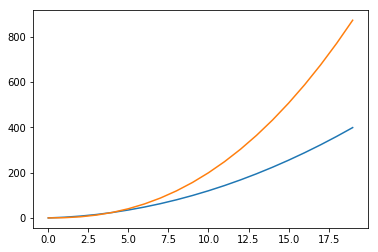

In [5]:
# This cell is only for demonstration purposes, you can reuse parts of this code to create your own plots
# Using matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
# above line is needed to make sure that the plots are displayed in the notebook.

#generate some dummy data
x = list(range(0, 20)) # generate a list
y = [x1**2+2*x1 for x1 in x] # create a new list using the original list. Note the Pythonic inline creation of lists.
y1 = [x1**2.3 for x1 in x]
plt.plot(x,y)
plt.plot(x,y1)

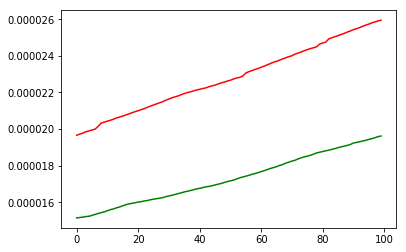

In [4]:
import matplotlib.pyplot as plt
import time


timeMillion=[]
for a in range(1,5):
    average_difference_time=[]
    for i in range(1,1000000,10000):
        dictionary = {a: a for a in range(1,1000000)}
        init_time= time.time()
        del dictionary[i]
        end_time = time.time() 
        difference_time = end_time - init_time
        timeMillion.append(difference_time)
        average_difference_time.append(sum(timeMillion)/100)

    

time10Million=[]
for b in range(1,5): 
    average_difference_time1=[]
    for i2 in range(1,10000000,100000):
        dictionary2 = {b: b for b in range(1,10000000)}
        init_time2= time.time()
        del dictionary2[i2]
        end_time2=time.time()
        difference_time2 = end_time2-init_time2
        time10Million.append(difference_time2)
        average_difference_time1.append(sum(time10Million)/100)
    
plt.plot(average_difference_time, color='green')
plt.plot(average_difference_time1, color='red')

    

In [31]:
'''As I guess, size and target do not affect the del performance of the dictionary. Dictionay has its own key for the item. When we do delete the key in dicitonary, the time would be constant; Big O notation: O(1). Based on the graph I generated, you can see there is a difference between two lists; timeMillion and time10Million. However, time difference is almost same for deleting each ith element. With this, the range of the time is so small to check the difference between each time difference.'''

'As I guess, size and target do not affect the del performance of the dictionary. Dictionay has its own key for the item. When we do delete the key in dicitonary, the time would be constant; Big O notation: O(1). Based on the graph I generated, you can see there is a difference between two lists; timeMillion and time10Million. However, time difference is almost same for deleting each ith element. With this, the range of the time is so small to check the difference between each time difference.'

## Problem 4 - The Two Envelopes Problem (20 Points)
The Two Envelopes problem is an interesting decision theory problem.

> Consider that you are given two indistinguishable envelopes, each containing money, one contains twice as much as the other. You may pick one envelope and keep the money it contains. Having chosen an envelope at will, but before inspecting it, you are given the chance to switch envelopes. Should you switch?

> The game is this: _stick_ or _switch_; It seems obvious that there is no point in switching envelopes as the situation is symmetric. However, because you stand to gain twice as much money if you switch while risking only a loss of half of what you currently have, it is possible to argue that it is more beneficial to switch.The problem is to show what is wrong with this argument.

**Two Envelopes problem**: Implement a function, called `simulateProblem()`, that does the game simulation for the two envelopes problem. Run the simulation 1000 times to figure out the empirical (observed) probability of gaining more money when switching and gaining more money when sticking to the original choice. Each simulation operates as follows:
1. First, randomly pick an envelopes configuration out of the two possible configurations, $(A,2A)$ or $(2A,A)$. In the first configuration, the second envelope has twice the money and in the second configuration, the first envelope has twice the money.
2. Next, randomly pick one of the two envelopes. 
3. Finally, randomly choose to either stick or switch. The program checks if you won (the envelope that picked has more money) or not (the envelope that picked has less money). In case of winning, record if the winning was because of _sticking_ or _switching_.

You can perform the _random_ choice as follows, using the `np.random.randint()` method.
```python
import numpy as np
print(np.random.randint(2))
```
The `simulateProblem()` function takes no arguments and returns two values, first is a boolean output which is `True` if you win and `False` if you lose. In case of a win, the second output is `True` if the win was due to _sticking_ and `False` if the win was due to _switching_.

Once the method `simulateProblem()` that does the above steps and returns _sticking_,or _switching_, depending on the win/loss scenario, run the method 1000 times and count the number of times the win was due to _sticking_ to the pick in Step 2, and number of times the win was due to _switching_ the envelope.

In [7]:
import numpy as np

def simulateProblem():
    # Enter your solution here
    envelope_config = [['A','2A'],['2A','A']]
    
    pick_envelope = envelope_config[np.random.randint(0,2)]
    
    pick_money = pick_envelope[np.random.randint(0,2)]
    
    pick_list=['A','2A']
    
    
    if pick_money == 'A':
        pick_decide = pick_list[np.random.randint(0,2)]
        if pick_money != pick_decide:
            return False #Switching
        else:
            return "lose"
         
    if pick_money == '2A':
        pick_decide = pick_list[np.random.randint(0,2)]
        if pick_money == pick_decide:
            return True #Sticking
        else:
            return "lose"
    
            
sticking = 0
switching= 0
# add more code belwo to count the number of wins due to sticking and switching
# and finally compute the desired probabilities

for i in range(1000):
    result = simulateProblem()
    if result == True:
            sticking= sticking+1
    elif result == False:
            switching= switching+1
    else :
        pass
    

    
print("Number of win by sticking :",sticking)
print("Number of win by switching :",switching)
print("Probability of win by sticking :", sticking/1000)
print("Probability of win by sticking :", switching/1000)

Number of win by sticking : 257
Number of win by switching : 217
Probability of win by sticking : 0.257
Probability of win by sticking : 0.217


### Which is better - sticking or switching?
Use the simulation results to figure out the right answer.

In [4]:
''' When I re-run this code several times, it seems that it does not matter whether you switch or stick to the original choice. As the result, both actions have the same probabilities.'''

' When I re-run this code several times, it seems that it does not matter whether you switch or stick to the original choice. As the result, both actions have the same probabilities.'